# Importazione librerie

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

# Apertura dataset

In [2]:
ds = pd.read_csv('dataset_IA_corretto.csv', sep=';', encoding='UTF-8')

# Exploratory Data Analysis

1. Statistiche descrittive dataset

In [3]:
print('Statistiche descrittive per il dataset:')
display(ds.describe())

Statistiche descrittive per il dataset:


,Student ID,Question ID,Type of Answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


2. Analisi domande

Numero di domande totali: 9546




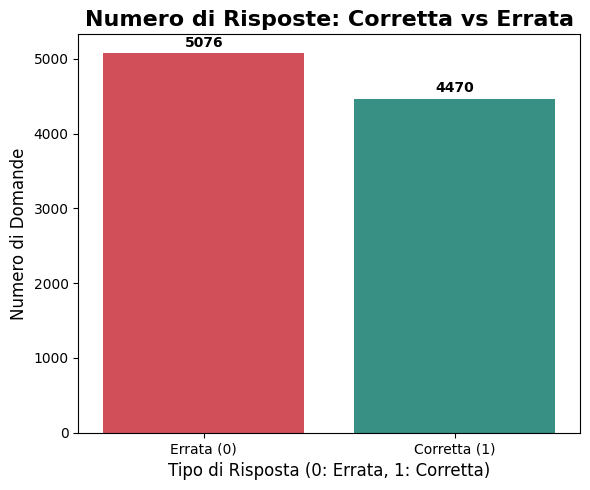

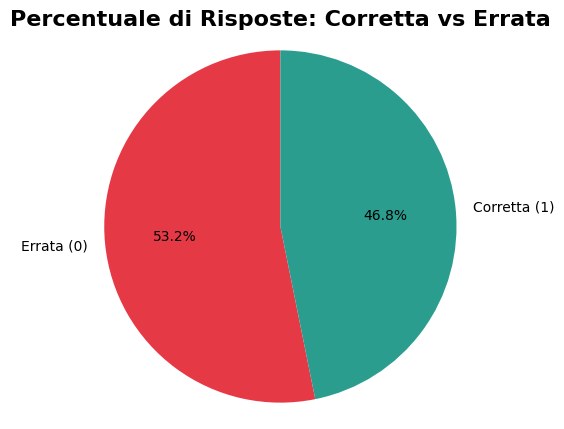

In [4]:
# Numero domande totali
print('Numero di domande totali:', end=' ')
print(ds['Question ID'].count())
print('\n')

# Numero di risposte corrette ed errate
domande = ds['Question ID'].count()
risposte = ds['Type of Answer'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=risposte.index, y=risposte.values, palette=['#e63946', '#2a9d8f'], hue=risposte.index, legend=False)
plt.title('Numero di Risposte: Corretta vs Errata', fontsize=16, fontweight='bold')
plt.xlabel('Tipo di Risposta (0: Errata, 1: Corretta)', fontsize=12)
plt.ylabel('Numero di Domande', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Errata (0)', 'Corretta (1)'])

for i, count in enumerate(risposte.values):
    plt.text(i, count + 50, str(count), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
print('\n')

# Percentuale di risposte corrette ed errate
percentuale = ds['Type of Answer'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 5))
plt.pie(percentuale, labels=['Errata (0)', 'Corretta (1)'], autopct='%1.1f%%', colors=['#e63946', '#2a9d8f'], startangle=90)
plt.title('Percentuale di Risposte: Corretta vs Errata', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

3. Analisi del grado della domanda

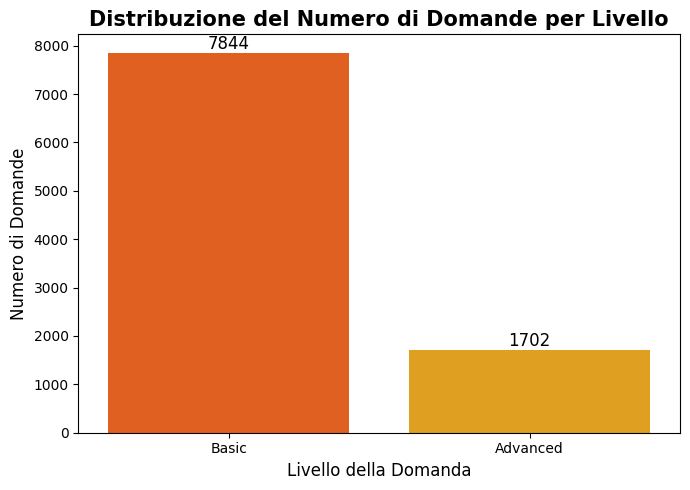

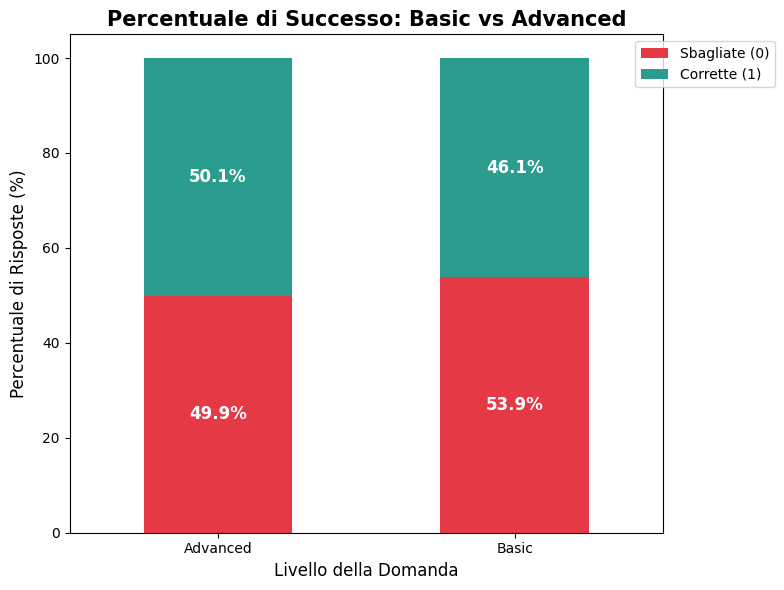

In [5]:
# Calcolo del numero di domande basic e advanced e creazione grafico]
plt.figure(figsize=(7, 5))
sns.countplot(x='Question Level', data=ds, hue='Question Level', palette='autumn', legend=False)

plt.title('Distribuzione del Numero di Domande per Livello', fontsize=15, fontweight='bold')
plt.xlabel('Livello della Domanda', fontsize=12)
plt.ylabel('Numero di Domande', fontsize=12)
plt.xticks(rotation=0)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
            fontsize=12, color='black', ha='center', va='bottom')

plt.tight_layout()
plt.show()
print('\n')

# Cacolo del tipo di risposta per tipo di domanda
livello_risposta = pd.crosstab(ds['Question Level'], ds['Type of Answer'], normalize='index') * 100

# Creazione del grafico
ax1 = livello_risposta.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#e63946', '#2a9d8f'])

plt.title('Percentuale di Successo: Basic vs Advanced', fontsize=15, fontweight='bold')
plt.xlabel('Livello della Domanda', fontsize=12)
plt.ylabel('Percentuale di Risposte (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Sbagliate (0)', 'Corrette (1)'], loc='upper right', bbox_to_anchor=(1.2, 1))

for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.text(x + width/2, y + height/2, f'{height:.1f}%',
    va='center', ha='center', color='white', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

4. Analisi delle nazioni

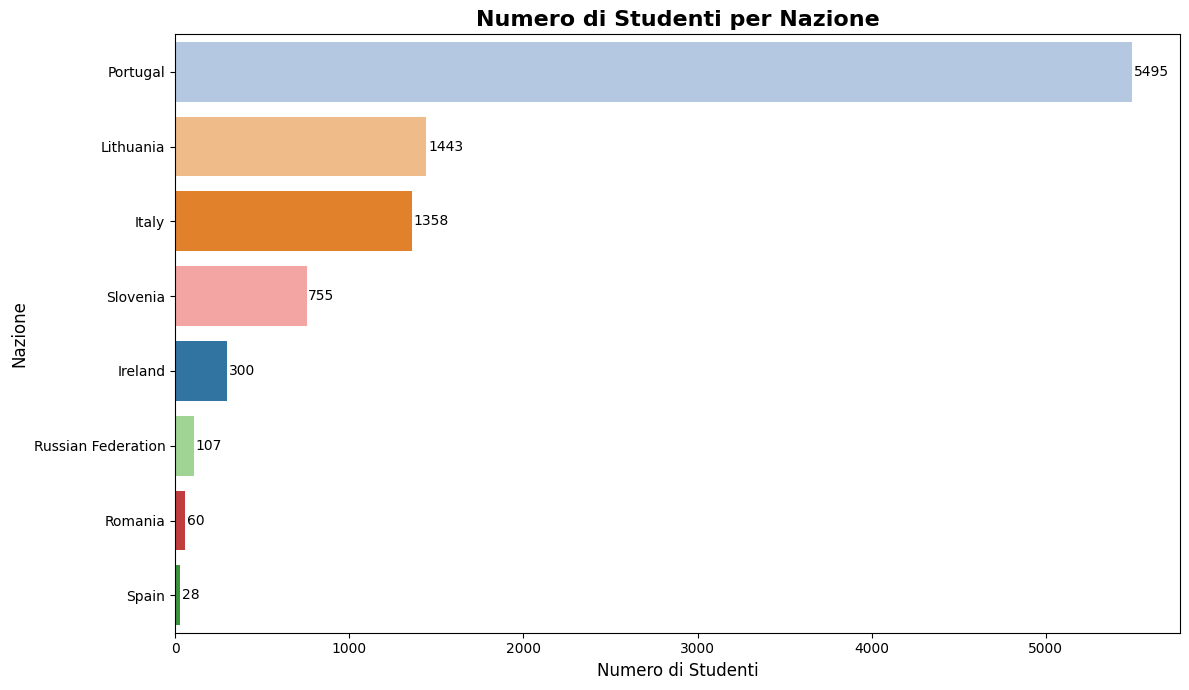

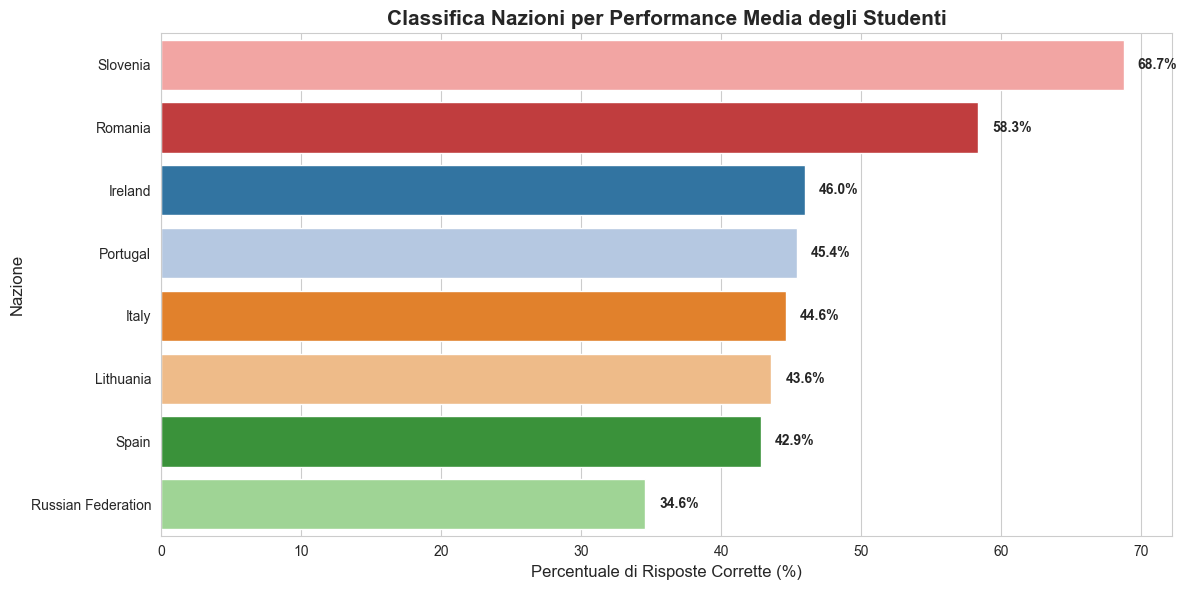

In [6]:
# Creazione di una palette colori univoca per ciascun paese
nazioni = ds['Student Country'].unique()
palette = sns.color_palette('tab20', n_colors=len(nazioni))
nazioniPalette = dict(zip(nazioni, palette))

# Calcolo del numero di studenti per nazione e creazione grafico
plt.figure(figsize=(12, 7))
sns.countplot(y='Student Country', data=ds, order=ds['Student Country'].value_counts().index, hue='Student Country', palette=nazioniPalette, legend=False)

plt.title('Numero di Studenti per Nazione', fontsize=16, fontweight='bold')
plt.xlabel('Numero di Studenti', fontsize=12)
plt.ylabel('Nazione', fontsize=12)

ax2 = plt.gca()
for p in ax2.patches:
    ax2.text(p.get_width() + 10, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}',
            fontsize=10, color='black', ha='left', va='center')

plt.tight_layout()
plt.show()
print('\n')

# Calcolo dei dati per il grafico di performance media per nazione
nazioni_risposta = ds.groupby('Student Country')['Type of Answer'].mean().sort_values(ascending=False).reset_index()
nazioni_risposta['Success Rate (%)'] = nazioni_risposta['Type of Answer'] * 100

# Creazione del grafico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plot = sns.barplot(x='Success Rate (%)', y='Student Country', data=nazioni_risposta, hue='Student Country', palette=nazioniPalette, legend=False)

for i in range(len(nazioni_risposta)):
    plt.text(nazioni_risposta['Success Rate (%)'][i] + 1, i, f"{nazioni_risposta['Success Rate (%)'][i]:.1f}%",
        va='center', fontweight='bold')

plt.title('Classifica Nazioni per Performance Media degli Studenti', fontsize=15, fontweight='bold')
plt.xlabel('Percentuale di Risposte Corrette (%)', fontsize=12)
plt.ylabel('Nazione', fontsize=12)
plt.tight_layout()

plt.show()

5. Analisi dei topic

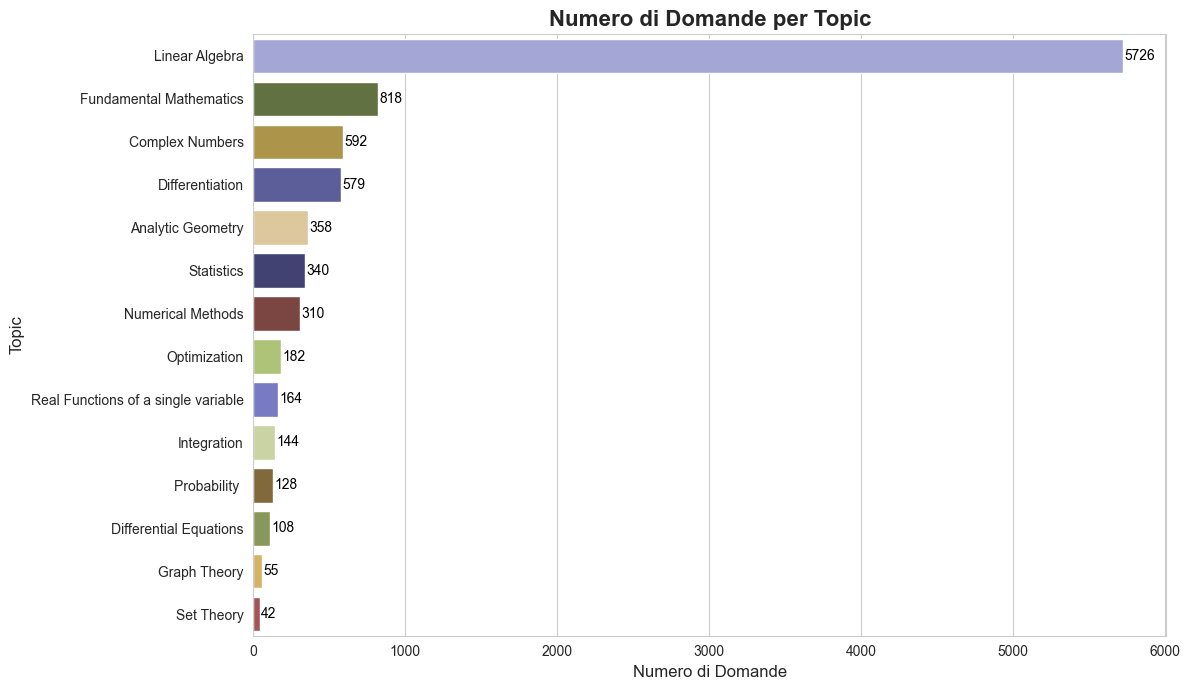

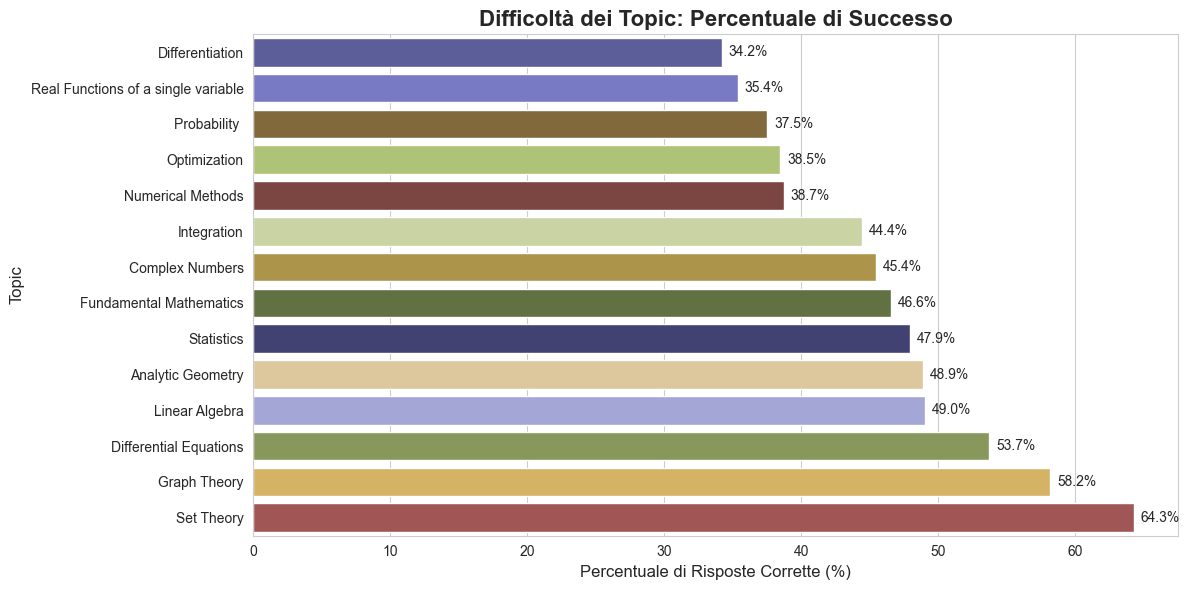

In [7]:
# Creazione di una palette colori univoca per ciascun paese
argomenti = ds['Topic'].unique()
palette2 = sns.color_palette('tab20b', n_colors=len(argomenti))
argomentiPalette = dict(zip(argomenti, palette2))

# Calcolo del numero di domande per topic e creazione grafico
plt.figure(figsize=(12, 7))
sns.countplot(y='Topic', data=ds, order=ds['Topic'].value_counts().index, hue='Topic', palette=argomentiPalette, legend=False)

plt.title('Numero di Domande per Topic', fontsize=16, fontweight='bold')
plt.xlabel('Numero di Domande', fontsize=12)
plt.ylabel('Topic', fontsize=12)

ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_width() + 10, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}',
            fontsize=10, color='black', ha='left', va='center')

plt.tight_layout()
plt.show()
print('\n')

# Calcolo dei dati per il grafico sulla percentuale di successo per topic
topic_risposta = ds.groupby('Topic')['Type of Answer'].mean().sort_values().reset_index()
topic_risposta['Success Rate (%)'] = topic_risposta['Type of Answer'] * 100

# Creazione del grafico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

plot = sns.barplot(x='Success Rate (%)', y='Topic', data=topic_risposta, hue='Topic', palette=argomentiPalette, legend=False)

for i in range(len(topic_risposta)):
    plt.text(
        topic_risposta['Success Rate (%)'][i] + 0.5,
        i,
        f"{topic_risposta['Success Rate (%)'][i]:.1f}%",
        va='center',
        fontsize=10
    )

plt.title('Difficoltà dei Topic: Percentuale di Successo', fontsize=16, fontweight='bold')
plt.xlabel('Percentuale di Risposte Corrette (%)', fontsize=12)
plt.ylabel('Topic', fontsize=12)

plt.tight_layout()
plt.show()

6. Matrice di correlazione

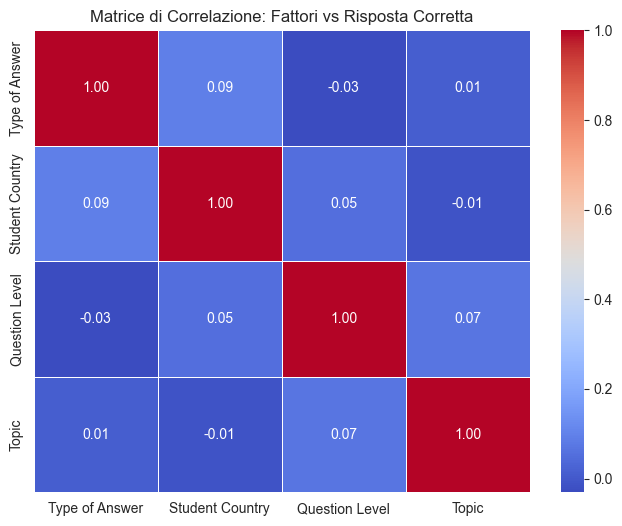

In [8]:
# Calcolo dei dati per il grafico
encoder = LabelEncoder()

columns_to_encode = ['Student Country', 'Question Level', 'Topic']
for col in columns_to_encode:
    ds[col] = encoder.fit_transform(ds[col].astype(str))

# Creazione del grafico
plt.figure(figsize=(8, 6))

matr_corr = ds[['Type of Answer', 'Student Country', 'Question Level', 'Topic']].corr()
sns.heatmap(matr_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matrice di Correlazione: Fattori vs Risposta Corretta')

plt.show()

# Preprocessing e Feature Engineering

In [9]:
# NLP delle Keywords 
ds['Keywords'] = ds['Keywords'].fillna('unknown').astype(str)
vect = CountVectorizer(tokenizer=lambda x: [s.strip() for s in x.split(',')],
                             token_pattern=None, lowercase=True, max_features=30)
keywords_matr = vect.fit_transform(ds['Keywords'])
keywords_matrDensa = pd.DataFrame(keywords_matr.toarray(), columns=vect.get_feature_names_out())

# One-Hot Encoding
ds_ml = ds.drop(['Student ID', 'Question ID', 'Keywords', 'Subtopic'], axis=1)
ds_ml = pd.get_dummies(ds_ml, columns=['Student Country', 'Question Level', 'Topic'], drop_first=True)

# Preparazione dataset per addestramento modello
X = pd.concat([ds_ml.drop('Type of Answer', axis=1).reset_index(drop=True), keywords_matrDensa], axis=1)
y = ds_ml['Type of Answer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"{X_train.shape[0]} campioni di training, {X_test.shape[0]} di test.")

7636 campioni di training, 1910 di test.


# Addestramento modello

In [10]:
# Addestramento modello con Random Forest
modelloForest = RandomForestClassifier(n_estimators=100, random_state=42)
modelloForest.fit(X_train, y_train)

y_predForest = modelloForest.predict(X_test)
print("Modello addestrato con Random Forest")

# Addestramento modello con Logistic Regression
modelloLog = LogisticRegression(max_iter=1000)
modelloLog.fit(X_train, y_train)

y_predLog = modelloLog.predict(X_test)
print("Modello addestrato con Logic Regression")

Modello addestrato con Random Forest
Modello addestrato con Logic Regression


# Valutazione addestramenti e conclusioni

Valutazione addestramento con Random Forest 



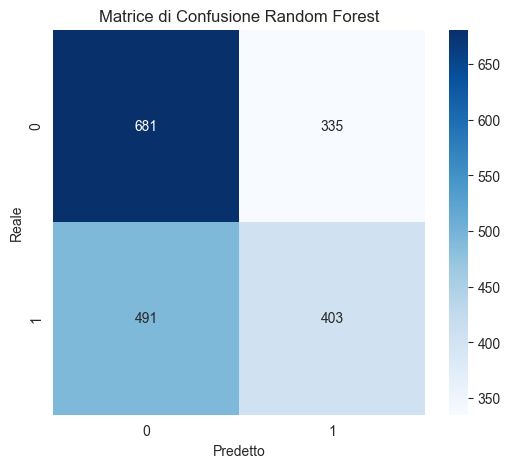



              precision    recall  f1-score   support

           0       0.58      0.73      0.64      1016
           1       0.56      0.39      0.46       894

    accuracy                           0.57      1910
   macro avg       0.57      0.56      0.55      1910
weighted avg       0.57      0.57      0.56      1910

Accuratezza Random Forest: 0.5675


Valutazione addestramento con Logistic Regression 



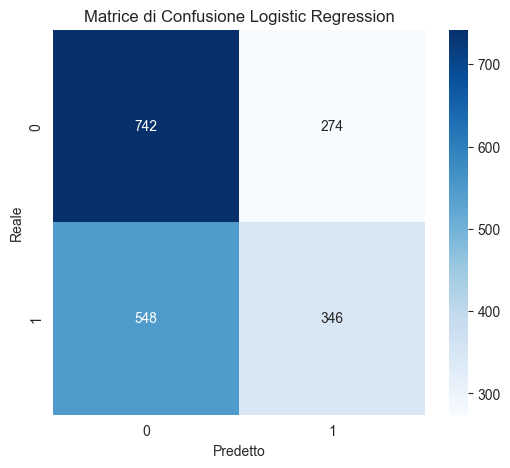



              precision    recall  f1-score   support

           0       0.58      0.67      0.62      1016
           1       0.55      0.45      0.49       894

    accuracy                           0.57      1910
   macro avg       0.56      0.56      0.56      1910
weighted avg       0.56      0.57      0.56      1910

Accuratezza Logistic Regression: 0.5696


Il modello Logistic Regression ha ottenuto un'accuratezza migliore.


In [11]:
# Matrice di confusione e calcolo accuratezza per Random Forest
print('Valutazione addestramento con Random Forest \n')
plt.figure(figsize=(6, 5))
cmForest = confusion_matrix(y_test, y_predForest)
sns.heatmap(cmForest, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione Random Forest')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()
print('\n')

accuracyForest = accuracy_score(y_test, y_predForest)
print(classification_report(y_test, y_predLog))
print(f"Accuratezza Random Forest: {accuracyForest:.4f}")

# Matrice di confusione e calcolo accuratezza per Logistic Regression
print('\n\nValutazione addestramento con Logistic Regression \n')
plt.figure(figsize=(6, 5))
cmLog = confusion_matrix(y_test, y_predLog)
sns.heatmap(cmLog, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione Logistic Regression')
plt.xlabel('Predetto')
plt.ylabel('Reale')
plt.show()
print('\n')

accuracyLog = accuracy_score(y_test, y_predLog)
print(classification_report(y_test, y_predForest))
print(f"Accuratezza Logistic Regression: {accuracyLog:.4f}")

# Conclusioni
if accuracyForest > accuracyLog:
    print("\n\nIl modello Random Forest ha ottenuto un'accuratezza migliore.")
elif accuracyLog > accuracyForest:
    print("\n\nIl modello Logistic Regression ha ottenuto un'accuratezza migliore.")
else:
    print("\n\nEntrambi i modelli hanno la stessa accuratezza.")